# Line Broadening

A transition line should have a wavelength corresponding to the exact energy difference between the transition levels,but the experimental spectrum obtained is not actually a perfect line, it has a width. This is called LINE BROADENING
The two prominent sources of line broadening in planetary atmospheres are thermal (Doppler) broadening 
and pressure (collisional) broadening. 

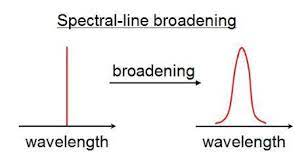

# Doppler Broadening
The relative velocity of the atoms or molecules leads to a change of frequency of the emitted or absorbed photon. This is the well known Doppler effect (the same as the change of pitch of an ambulance speeding towards you).

When broadening occurs due to the random thermal motion of particles, it is called Thermal Doppler Broadening, and induces a Gaussian distribution. The width of the Gaussian lineshape depends only on the frequency of the spectral line, the mass of the emitting particles (lighter molecules show a larger broadening), and their temperature. If the resolution is high enough (for instance in laser spectroscopy), it can even be used to infer the temperature of the molecule.

Doppler broadening is most significant, compared to other sources of broadening at: low pressure, high temperature, and small wavelength. 
 

The corresponding Gaussian line profile,

# $ ϕ(ν)= \frac{c}{a v_0 \sqrt{\pi}} {exp}\left( \frac  {-c^2 (v-v_0)^2 }{a^2 v_0^2}\right)\ \ \ \ \ \ \ \ \ \ \  $ 




 $ where \ a = \sqrt \frac {2kt}{M} $

### Example

In the following, we will illustrate this by computing the Gaussian broadening of a line of carbon monoxide (CO) :

<AxesSubplot:xlabel='wav'>

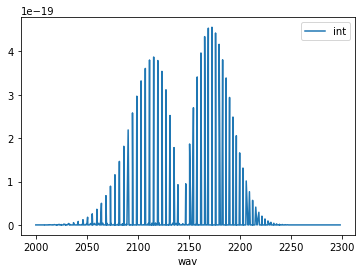

In [22]:
import radis
#%% Get a line. We're using, arbitrarily, one single line of CO 
from radis.test.utils import getTestFile
from radis.io.hitran import hit2df

# Loading all CO lines from this test file : 
df = hit2df(getTestFile("hitran_co_3iso_2000_2300cm.par"))

# This database has many lines : 
df.plot("wav", "int")
#%%

In [23]:
# Let's keep the most intense line only : 
df = df.iloc[df["wav"].argmax()]

# We're ready. Let's print the line detail.  
print(df)

id        5.000000e+00
iso       1.000000e+00
wav       2.298446e+03
int       2.449000e-30
A         2.242000e+01
airbrd    4.200000e-02
selbrd    4.100000e-02
El        5.863488e+03
Tdpair    6.700000e-01
Pshft    -3.000000e-03
gp        1.130000e+02
gpp       1.110000e+02
branch    1.000000e+00
jl        5.500000e+01
vu        1.000000e+00
vl        0.000000e+00
Name: 572, dtype: float64


In [24]:
# %% 
# It is centered around 2298 cm-1 
w_center = df.wav 
# %% Without broadnening, all photons from this transition would have the same 
# energy 

In [25]:
import numpy as np 
# i.e., if we measured the spectra over 1 cm-1 on each side of the transition,
# we would see a dirac
w = np.linspace(df.wav - 1, df.wav + 1, 5000) 

#We can compute the width of the broadening in RADIS
from radis.lbl.broadening import doppler_broadening_HWHM
hwhm_doppler = doppler_broadening_HWHM(df.wav, molar_mass=29, Tgas=300)
print("Width of the doppler broadening: ",hwhm_doppler, "cm-1")

Width of the doppler broadening:  0.002647402599856449 cm-1


 Therefore it creates a **Gaussian lineshape**

Link to Radis Documentation:
https://radis.readthedocs.io/en/latest/source/radis.lbl.broadening.html#radis.lbl.broadening.gaussian_lineshape

Text(0, 0.5, 'Doppler Lineshape')

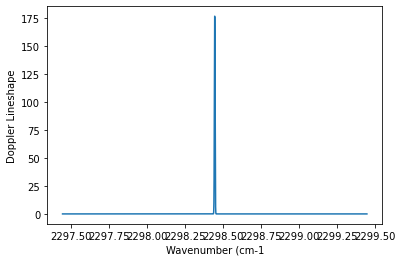

In [26]:
from radis.lbl.broadening import gaussian_lineshape
I = gaussian_lineshape(w - w_center, hwhm_doppler)

# Let's plot 
import matplotlib.pyplot as plt
plt.plot(w, I)
plt.xlabel("Wavenumber (cm-1")
plt.ylabel("Doppler Lineshape")

(2298.4, 2298.5)

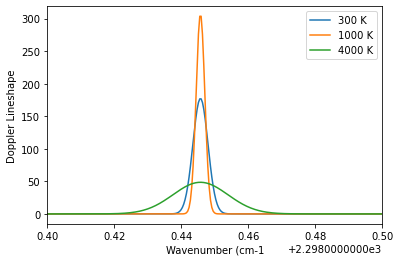

In [27]:
#%% As you can see the broadening is extremelly small
# let's do the same at higher temperature : 

hwhm_doppler_300 = doppler_broadening_HWHM(df.wav, molar_mass=29, Tgas=300)
hwhm_doppler_1000 = doppler_broadening_HWHM(df.wav, molar_mass=29, Tgas=1000)
hwhm_doppler_4000 = doppler_broadening_HWHM(df.wav, molar_mass=29, Tgas=4000)

I_300 = gaussian_lineshape(w - w_center, hwhm_doppler_300)
I_1000 = gaussian_lineshape(w - w_center, hwhm_doppler_1000)
I_4000 = gaussian_lineshape(w - w_center, hwhm_doppler_4000)

# Let's plot 
plt.figure()
plt.plot(w, I_300, label="300 K")
plt.plot(w, I_1000, label="1000 K")
plt.plot(w, I_4000, label="4000 K")
plt.xlabel("Wavenumber (cm-1")
plt.ylabel("Doppler Lineshape")
plt.legend()
plt.xlim((2298.4, 2298.5))
# %%

The broadening increases with the temperature , however it remains very low (< 0.02 cm-1) even at extremelly high temperatures of 4000 K.

# Collisional Broadening
If a molecule is disturbed by a collision, this shortens the lifetime of the level, ie the decay rate is increased. This will increase the uncertainty in the emitted/absorbed energy, so that photons at a frequency $ ν_0 $ ± Δν can also be absorbed or emitted. This broadening factor is linked to the number of collisions, and therefore it is linked to the pressure,the temperature, and the nature of the colliding partner. 

It is also called pressure broadening. Pressure broadening mainly takes place in dense environments like stellar and
planetary atmospheres and dominates over Doppler Broadening.Collisions between molecules or atoms, induce pressure
which can supply or remove small amounts of energy during radiative transitions, thereby allowing photons 
with a broader range of frequencies to produce a particular transition of a molecule.

Collision broadening is most significant at High Pressure, low Temperature, large Wavelength.

The corresponding line has a Lorentzian profile, 

# $                        ϕ(ν)= \frac{1}{\pi} \frac{\gamma_{lb}}{\gamma_{lb}^2+w_{centered}^2}$

At the first order it is proportional to the pressure and to a coefficient :

## $ \\sigma\_{collisions}=\gamma_{self} \cdot P  $

In [28]:
sigma_collisions = df.selbrd * 1
print("pressure broadening at 1 atm : ", sigma_collisions, "cm-1")

pressure broadening at 1 atm :  0.041 cm-1


In [29]:
# Let's calculate for x = 0.3
P = 1  # atm
sigma_collisions = (df.selbrd * 0.3 + df.airbrd * 0.7) * P
print("pressure broadening at 1 atm with 30% CO, 70% air : ", sigma_collisions, "cm-1")

pressure broadening at 1 atm with 30% CO, 70% air :  0.0417 cm-1


# Effect of collisional partner

We notice it is already much larger ( ~0.041 cm-1) than the temperature broadenings computed before. This depends linearly on the pressure. At a very low pressure (1e-6 bar, or mTorr) the Doppler broadneing would be dominant.

In reality the collisional broadneing coefficients also depends on the collisional partner. 

At first order it is the sum of the partial fractions of all components of the gas 
mixture, multiplied by the respective broadening coefficient. 

Example : for a line of CO in a mixture of CO2, H2O, N2, there is "self-broadening" 

 with CO (coefficient :math:\\gamma_{CO, CO)) and broadening with CO2, H2O and N2 

(coefficients :math:\\gamma_{CO_2, CO), etc.)

    

..math::

    





# $ sigma\_total = \sum_i={CO, CO_2,H_2O, N_2} \gamma_{i, CO} \cdot P\_i $

By default in HITRAN and RADIS, only two components are allowed : the molecule of the transition, and a single diluent, by default the air. The partial pressure of the emitting molecule is :math:`x \\cdot P`, the rest of the diluent is 

:math:`(1-x) \\cdot P`. We get : 


# $ sigma\_collisions=\gamma_{self} P x + \gamma_{air} P (1-x) $

The broadening did not change much, because the broadening coefficients of CO 
collisionned by CO or by air are quite similar. It can be very different 
when the collisional partner is a larger molecule, like CO2 or H2O : differences of more than 100% can be obtained. 
The formula above is actually an approximation.

In reality, the collisional broadening also depend on the temperature. The HITRAN database includes
temperature correction coefficients for self-broadening ``Tdpsel`` and air broadening ``Tdpair``: 

# $sigma\_{collisions}={\left(\frac{T_{ref}}{T_{gas}}\right)}^{n_{air}} \gamma_{air} P \left(1-x\right)+{\left(\frac{T_{ref}}{T_{gas}}\right)}^{n_{self}} \gamma_{self} P x $

This is the equation implemented in RADIS. We obtain it with

Link to Radis Documentation:
https://radis.readthedocs.io/en/latest/source/radis.lbl.broadening.html#radis.lbl.broadening.pressure_broadening_HWHM

In [30]:
# :py:func:`~radis.lbl.broadening.pressure_broadening_HWHM`

from radis.lbl.broadening import pressure_broadening_HWHM
sigma_collisions = pressure_broadening_HWHM(df.airbrd, df.selbrd, df.Tdpair, df.Tdpair, pressure_atm=1, mole_fraction=0.3, Tgas=300, Tref=298)

# (in this present database, the temperature dependance of the self-broadening coefficient
# Tdpsel is not given ; we use Tdpair instead. RADIS does the same thing by default)
# (and sometimes yield a :py:class:`~radis.misc.warning.MissingSelfBroadeningWarning`)
print("pressure broadening at 1 atm with 30% CO, 70% air, and T-dependance : ", sigma_collisions, "cm-1")

pressure broadening at 1 atm with 30% CO, 70% air, and T-dependance :  0.04151353450608599 cm-1


 We can now compute the lineshape. It has a **Lorentzian shape**, and not Gaussian :

Link to Radis Documentation:
https://radis.readthedocs.io/en/latest/source/radis.lbl.broadening.html#radis.lbl.broadening.lorentzian_lineshape

Text(0, 0.5, 'Collisional Lineshape')

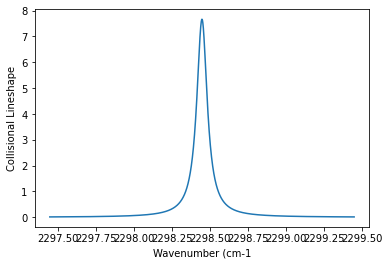

In [31]:
from radis.lbl.broadening import lorentzian_lineshape
# Let's plot 
import matplotlib.pyplot as plt
plt.plot(w, lorentzian_lineshape(w - w_center, sigma_collisions))
plt.xlabel("Wavenumber (cm-1")
plt.ylabel("Collisional Lineshape")

# Effect of Pressure

In [32]:
# Now, let's calculate the same at higher pressure

PB_5 = pressure_broadening_HWHM(df.airbrd, df.selbrd, df.Tdpair, df.Tdpair, pressure_atm=20, mole_fraction=0.3, Tgas=300, Tref=298)
print("pressure broadening at 5 atm with 30% CO, 70% air, and T-dependance : ", PB_5 , "cm-1")


PB_10 = pressure_broadening_HWHM(df.airbrd, df.selbrd, df.Tdpair, df.Tdpair, pressure_atm=10, mole_fraction=0.3, Tgas=300, Tref=298)
print("pressure broadening at 10 atm with 30% CO, 70% air, and T-dependance : ", PB_10, "cm-1")


PB_20 = pressure_broadening_HWHM(df.airbrd, df.selbrd, df.Tdpair, df.Tdpair, pressure_atm=5, mole_fraction=0.3, Tgas=300, Tref=298)
print("pressure broadening at 20 atm with 30% CO, 70% air, and T-dependance : ", PB_20, "cm-1")


pressure broadening at 5 atm with 30% CO, 70% air, and T-dependance :  0.8302706901217197 cm-1
pressure broadening at 10 atm with 30% CO, 70% air, and T-dependance :  0.41513534506085986 cm-1
pressure broadening at 20 atm with 30% CO, 70% air, and T-dependance :  0.20756767253042993 cm-1


The broadening decreases with increasing pressure.

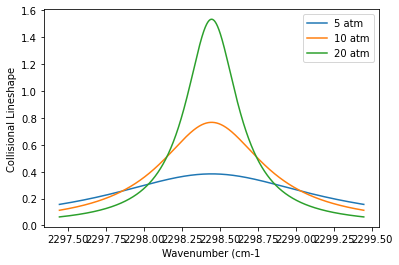

In [33]:
plt.plot(w, lorentzian_lineshape(w - w_center, PB_5), label="5 atm")
plt.plot(w, lorentzian_lineshape(w - w_center, PB_10), label="10 atm")
plt.plot(w, lorentzian_lineshape(w - w_center, PB_20), label="20 atm")
plt.xlabel("Wavenumber (cm-1")
plt.ylabel("Collisional Lineshape")
plt.legend()

# Voigt Profile

A Voigt profile results from the convolution of two broadening mechanisms, one of which alone would produce a Gaussian profile (usually, as a result of the Doppler broadening), and the other would produce a Lorentzian profile. 
Combining a Lorentz∞and a Gauss profile implies convolving both profiles, which is
# $ ϕ(ν)= ∫ ϕ_G(ν′) ϕ_L (ν_0 + ν − ν′) dν′$
 This is called a Voigt profile

When more than one broadening processes are present, the combined eﬀect is the convolution of the diﬀerent profiles
In reality, all broadening effects co-exist. The lineshapes must be convolved.


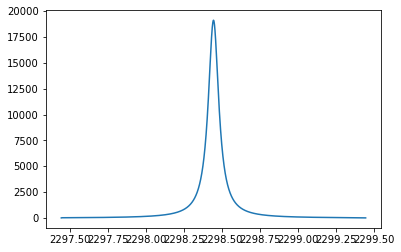

In [34]:
#Manual convolution
y=np.convolve(I_300, lorentzian_lineshape(w - w_center, sigma_collisions),mode="same")
plt.plot(w,y)

Link to Radis Documentation:
https://radis.readthedocs.io/en/latest/source/radis.lbl.broadening.html#radis.lbl.broadening.voigt_broadening_HWHM

In [35]:
#Voigt Profile using RADIS
from radis.lbl.broadening import voigt_broadening_HWHM
gamma_voigt, gamma_lb, gamma_db=voigt_broadening_HWHM(df.airbrd,df.selbrd,df.Tdpair,df.Tdpair,df.wav,molar_mass=29,pressure_atm=1,mole_fraction=0.3,Tgas=300,Tref=298)

print("Half-width at Half-Maximum of Voigt=",gamma_voigt)
print("Half-width at Half-Maximum of Lorentz=",gamma_lb)
print("Half-width at Half-Maximum of Gaussian=",gamma_db)

Half-width at Half-Maximum of Voigt= 0.041692467738126175
Half-width at Half-Maximum of Lorentz= 0.04151353450608599
Half-width at Half-Maximum of Gaussian= 0.002647402599856449


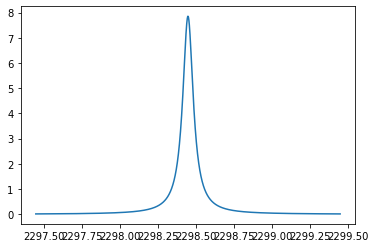

In [36]:
#Voigt Lineshape
from radis.lbl.broadening import voigt_lineshape
plt.plot(w,voigt_lineshape(w - w_center,gamma_lb, gamma_voigt, jit=False))

#the voigt lineshape calculated using manual convolution matches with the lineshape calculated in RADIS 

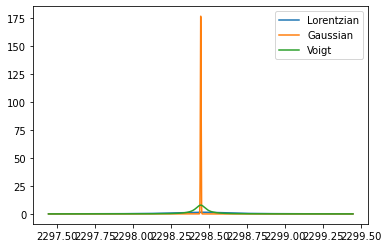

In [37]:
#All the 3 lineshapes
plt.plot(w, lorentzian_lineshape(w - w_center, PB_20), label="Lorentzian")
plt.plot(w, gaussian_lineshape(w - w_center, hwhm_doppler_300),label="Gaussian")
plt.plot(w,voigt_lineshape(w - w_center,gamma_lb, gamma_voigt, jit=False),label="Voigt")
plt.legend()

# Natural Broadening

Every excited quantum state has an intrinsic life-
time before it spontaneously decays to a lower energy
state. At the most fundamental level,
a transition between two states will not result in the
absorption or emission of light of a single wavelength
only. Instead a range of wavelengths can excite or de-
excite quantum transitions. 

This natural broadening
is a result of Heisenberg’s Uncertainty Principal which
indicates that there is an uncertainty in the energy
state of a system, ∆E, due to an uncertainty in the
lifetime of the state, ∆t, such that ∆E∆t ≈ h/2π.
Here h= 6.626×10−34 m2 kg/s is the Planck’s con-
stant.

# REFERENCES

--Effect of Pressure Broadening on Molecular Absorption Cross Sections in Exoplanetary Atmospheres
  Christina Hedges∗ & Nikku Madhusudhan†, Institute of Astronomy, University of Cambridge, Madingley Road, Cambridge, CB3 0HA, UK                                                                                                            
https://www.repository.cam.ac.uk/bitstream/handle/1810/316291/stw278.pdf?sequence=3

--https://en.wikipedia.org/wiki/Spectral_line

--https://hitran.org/docs/definitions-and-units/